__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/10_Create_Random_Data.ipynb)__

# Create Random Data for Testing
* `random_series`: Returns a series of random data of several types, including names, random walks with perlin-noise and errorprone series to test your functions.
* `decorate`: Decorates a series with specials (e.g. NaNs)
* `people` and `random_numbers`: Random data for testing.

In [86]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = /media/me/LinuxDropbox/Dropbox
environment['lib_path']     = /media/me/LinuxDropbox/Dropbox/31_Projekte/01_Python/libs
Start Time: 17:02:27


In [87]:
import numpy      as np
import pandas     as pd 
import polars     as pl
import bpyth      as bpy
import random

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# Config
pak.Config.set('VERBOSE', True)
pak.Config.set('FRAMEWORK', 'polars')
#pak.Config.set('FRAMEWORK', 'pandas')

# copy_on_write
pd.set_option("mode.copy_on_write", True)

VERBOSE = True
--> setting parameter verbose=True as default for all pandasklar functions

FRAMEWORK = polars
--> setting parameter framework=polars as default for all pandasklar functions



## random_series()

In [88]:
?pak.random_series

Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a pd.Series of random data.
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'time', mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many d

### Simple

In [89]:
# i f s n c means int float string name choice
size = 100
i = pak.random_series( size, 'i')
f = pak.random_series( size, 'f')
s = pak.random_series( size, 's')
n = pak.random_series( size, 'n')
c = pak.random_series( size, 'c')
t = pak.random_series( size, 't')
df = pak.dataframe( (i, f, s, n, c, t) )
df

dataframe: Input rtype=('tuple', 'Series', 'int') shape=(6, 100)
dataframe: list or tuple of ndarray or Series


shape: (100, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ rnd_int ‚îÜ rnd_float ‚îÜ rnd_string ‚îÜ rnd_name ‚îÜ rnd_choice ‚îÜ rnd_time                      ‚îÇ
‚îÇ ---     ‚îÜ ---       ‚îÜ ---        ‚îÜ ---      ‚îÜ ---        ‚îÜ ---                           ‚îÇ
‚îÇ i64     ‚îÜ f64       ‚îÜ str        ‚îÜ str      ‚îÜ str        ‚îÜ datetime[ns]                  ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 267     ‚îÜ 0.847     ‚îÜ iWze4G     ‚îÜ Helene   ‚îÜ e          ‚îÜ 1983-09-21 20:31:11.115704832 ‚îÇ
‚îÇ 519     ‚îÜ 0.23      ‚îÜ l44yXX7    ‚îÜ Andre    ‚îÜ c          ‚îÜ 1934-10-10 19:22:32.257912960 ‚îÇ
‚îÇ 354     ‚îÜ 0.502     ‚îÜ C√úB4KTq    ‚îÜ Tanja    ‚îÜ d          ‚îÜ 1923-10-27 11:34:48.534924288 ‚îÇ
‚îÇ 968     ‚îÜ 0.904     ‚îÜ ZQC√§PN     ‚îÜ Theresa  ‚îÜ a          ‚îÜ 1982-05-04 12:07:03.543309312 ‚îÇ
‚îÇ 907     ‚îÜ 0.079     ‚îÜ qapti      ‚îÜ Eric     ‚îÜ b          ‚îÜ 1992-11-13 23:37:12.161116160 ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶                             ‚îÇ
‚îÇ 509     ‚îÜ 0.914     ‚îÜ uiWE1      ‚îÜ Linda    ‚îÜ c          ‚îÜ 1927-02-20 08:01:54.686670336 ‚îÇ
‚îÇ 658     ‚îÜ 0.684     ‚îÜ 0OLAa      ‚îÜ Nadine   ‚îÜ e          ‚îÜ 2020-06-19 12:21:14.230460928 ‚îÇ
‚îÇ 799     ‚îÜ 0.492     ‚îÜ DaujLy√º    ‚îÜ Lilly    ‚îÜ e          ‚îÜ 1913-05-22 16:16:42.283956224 ‚îÇ
‚îÇ 667     ‚îÜ 0.093     ‚îÜ VboTc      ‚îÜ Isabell  ‚îÜ e          ‚îÜ 1950-03-18 10:36:08.512781824 ‚îÇ
‚îÇ 272     ‚îÜ 0.47      ‚îÜ √∂bKQ       ‚îÜ Max      ‚îÜ e          ‚îÜ 2019-02-26 03:18:40.499346944 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [90]:
#pak.analyse_cols(df)

### Random Numbers

In [91]:
# Several types of random numbers, with parameters
size = 100
i = pak.random_series( size, 'int',        min=-5, max=5,     p_nan=0.1,   p_dup=0    )
f = pak.random_series( size, 'float',      decimals=4,        p_nan=0.1,   p_dup=0    )                       
a = pak.random_series( size, 'ascending'                                              )
d = pak.random_series( size, 'descending'                                             )
p = pak.random_series( size, 'perlin',     freq=[2,1,8,1],                            )

# decorate f with 50% 0-values  
f = f.apply(pak.decorate, special=0, p=0.5)  

df = pak.dataframe( (i,f,a,d,p) )
pak.sample(df)

dataframe: Input rtype=('tuple', 'Series', 'int') shape=(5, 100)
dataframe: list or tuple of ndarray or Series


shape: (8, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ rnd_int ‚îÜ rnd_float ‚îÜ rnd_ascending ‚îÜ rnd_descending ‚îÜ rnd_perlin ‚îÇ
‚îÇ ---     ‚îÜ ---       ‚îÜ ---           ‚îÜ ---            ‚îÜ ---        ‚îÇ
‚îÇ f64     ‚îÜ f64       ‚îÜ i64           ‚îÜ f64            ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ -2.0    ‚îÜ 0.0       ‚îÜ 0             ‚îÜ 1.0            ‚îÜ 0.0        ‚îÇ
‚îÇ null    ‚îÜ 0.0       ‚îÜ 0             ‚îÜ 0.994172       ‚îÜ -0.089272  ‚îÇ
‚îÇ -5.0    ‚îÜ 0.4562    ‚îÜ 0             ‚îÜ 0.99078        ‚îÜ -0.125352  ‚îÇ
‚îÇ 5.0     ‚îÜ null      ‚îÜ 0             ‚îÜ 0.912264       ‚îÜ -0.553941  ‚îÇ
‚îÇ 2.0     ‚îÜ 0.0       ‚îÜ 0             ‚îÜ 0.899099       ‚îÜ -0.968957  ‚îÇ
‚îÇ 2.0     ‚îÜ 0.9883    ‚îÜ 0             ‚îÜ 0.863165       ‚îÜ 0.049122   ‚îÇ
‚îÇ -1.0    ‚îÜ 0.0       ‚îÜ 0             ‚îÜ 0.765542       ‚îÜ 1.0        ‚îÇ
‚îÇ -3.0    ‚îÜ 0.0       ‚îÜ 0             ‚îÜ 0.0            ‚îÜ -0.026782  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: >

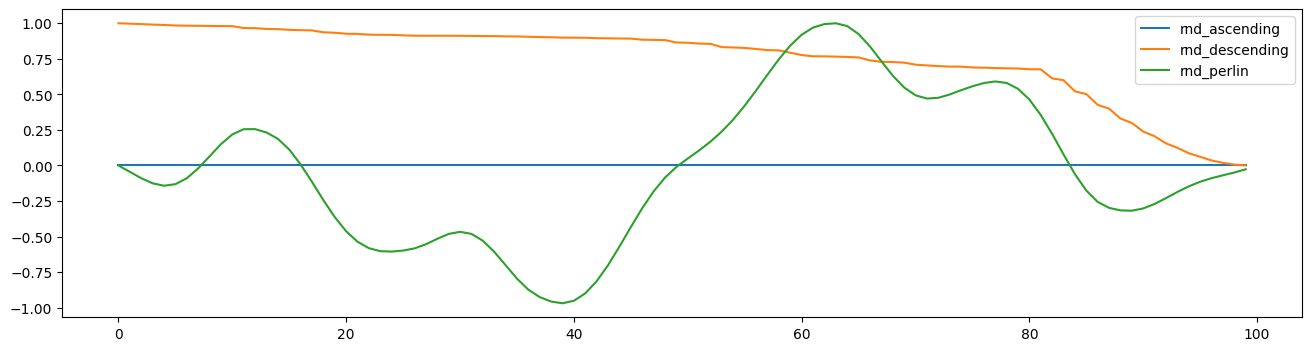

In [92]:
# ascending, descending and perlin are ordered random sequences
%matplotlib inline
spalten = ['rnd_ascending','rnd_descending','rnd_perlin',]
pak.plot(df[spalten])

In [93]:
#pak.analyse_cols(df)

### Strings, names, lists and other types

In [94]:
# Strings, names, lists and other types, with parameters
size = 100
s = pak.random_series( size, 'string', len_min=2, len_max=20,           p_nan=0.2,   p_dup=0    )
n = pak.random_series( size, 'name',                                    p_nan=0.2,   p_dup=0.33 )
c = pak.random_series( size, 'choice', choice=['Bremen','Bremerhaven'], p_nan=0.3,   p_dup=0,    name='rnd_city')
l = pak.random_series( size, 'list',                                    p_nan=0.3,   p_dup=0.5  )
t = pak.random_series( size, 'time',  min='1883-01-01',                 p_nan=0.3,   p_dup=0.5  )
df = pak.dataframe( (s, n, c, l, t) )
pak.sample(df)

dataframe: Input rtype=('tuple', 'Series', 'str') shape=(-77, -77)
dataframe: list or tuple of ndarray or Series


shape: (10, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ rnd_string          ‚îÜ rnd_name ‚îÜ rnd_city    ‚îÜ rnd_list                     ‚îÜ rnd_time           ‚îÇ
‚îÇ ---                 ‚îÜ ---      ‚îÜ ---         ‚îÜ ---                          ‚îÜ ---                ‚îÇ
‚îÇ str                 ‚îÜ str      ‚îÜ str         ‚îÜ list[str]                    ‚îÜ datetime[ns]       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 5t7Rfu8K√∂vG7i       ‚îÜ Emil     ‚îÜ Bremen      ‚îÜ ["Paula", "Monika", null]    ‚îÜ 1995-07-30         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ                              ‚îÜ 00:51:46.264637952 ‚îÇ
‚îÇ gb                  ‚îÜ null     ‚îÜ Bremerhaven ‚îÜ ["Elisabeth", "Karl", ‚Ä¶      ‚îÜ null               ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ "Anne"‚Ä¶                      ‚îÜ                    ‚îÇ
‚îÇ Y5N√§2A              ‚îÜ null     ‚îÜ Bremerhaven ‚îÜ null                         ‚îÜ 1983-10-29         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ                              ‚îÜ 16:40:13.913416704 ‚îÇ
‚îÇ null                ‚îÜ Meik     ‚îÜ Bremerhaven ‚îÜ ["Marvin", "Merle", ‚Ä¶        ‚îÜ null               ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ "Clara"]                     ‚îÜ                    ‚îÇ
‚îÇ Pj√§WanoElnUo√§jXrVCy ‚îÜ Kathrin  ‚îÜ Bremerhaven ‚îÜ ["Elena", "Kim"]             ‚îÜ 1930-12-05         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ                              ‚îÜ 05:04:09.085325824 ‚îÇ
‚îÇ null                ‚îÜ Till     ‚îÜ null        ‚îÜ ["Tanja", "Anja", ‚Ä¶          ‚îÜ 2007-06-22         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ "Ulrich"]                    ‚îÜ 23:20:09.027655168 ‚îÇ
‚îÇ GWaA√∂√úfE            ‚îÜ Joshua   ‚îÜ Bremen      ‚îÜ ["Tobias", "Gertrud", "Tom"] ‚îÜ 1990-03-14         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ                              ‚îÜ 12:56:05.322127872 ‚îÇ
‚îÇ 12o√§Kv              ‚îÜ Sylvia   ‚îÜ null        ‚îÜ ["Alina", "Tom", ‚Ä¶ "Lars"]   ‚îÜ null               ‚îÇ
‚îÇ null                ‚îÜ Ute      ‚îÜ Bremen      ‚îÜ ["Michelle", "Ida", ‚Ä¶        ‚îÜ 1889-08-12         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ "Tanja"]                     ‚îÜ 13:45:40.577505792 ‚îÇ
‚îÇ √§1BuYyD             ‚îÜ Anton    ‚îÜ null        ‚îÜ ["Vincent", "Jakob", ‚Ä¶ null] ‚îÜ 1992-12-09         ‚îÇ
‚îÇ                     ‚îÜ          ‚îÜ             ‚îÜ                              ‚îÜ 21:34:59.831385088 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

### Random progressions
Random progressions are `random_series` with typ `'ascending'`, `'descending'` or `'perlin'`.

In [95]:
# Some random progressions
size = 100
a = pak.random_series( size, random.choice([ 'a','d','p']))
b = pak.random_series( size, random.choice([ 'a','d','p']))
c = pak.random_series( size, random.choice([ 'a','d','p']))
d = pak.random_series( size, random.choice([ 'a','d','p']))
e = pak.random_series( size, random.choice([ 'a','d','p']))
f = pak.random_series( size, random.choice([ 'a','d','p']))
g = pak.random_series( size, random.choice([ 'a','d','p']))
h = pak.random_series( size, random.choice([ 'a','d','p']))
i = pak.random_series( size, random.choice([ 'a','d','p']))
j = pak.random_series( size, random.choice([ 'a','d','p']))
df = pak.dataframe( (a,b,c,d,e,f,g,h,i,j) )
df.head(3)

dataframe: Input rtype=('tuple', 'Series', 'float') shape=(10, 100)
dataframe: list or tuple of ndarray or Series


shape: (3, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ rnd_perli ‚îÜ rnd_ascen ‚îÜ rnd_perli ‚îÜ rnd_ascen ‚îÜ ‚Ä¶ ‚îÜ rnd_ascen ‚îÜ rnd_desce ‚îÜ rnd_ascen ‚îÜ rnd_perl ‚îÇ
‚îÇ n         ‚îÜ ding      ‚îÜ n_1       ‚îÜ ding_1    ‚îÜ   ‚îÜ ding_2    ‚îÜ nding_2   ‚îÜ ding_3    ‚îÜ in_2     ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---      ‚îÇ
‚îÇ f64       ‚îÜ i64       ‚îÜ f64       ‚îÜ f64       ‚îÜ   ‚îÜ f64       ‚îÜ i64       ‚îÜ f64       ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0       ‚îÜ 0         ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0         ‚îÜ 0.0       ‚îÜ 0.0      ‚îÇ
‚îÇ -0.054525 ‚îÜ 0         ‚îÜ 0.03908   ‚îÜ 0.010279  ‚îÜ ‚Ä¶ ‚îÜ 0.00272   ‚îÜ 0         ‚îÜ 0.000046  ‚îÜ -0.04669 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 9        ‚îÇ
‚îÇ -0.123914 ‚îÜ 0         ‚îÜ 0.060021  ‚îÜ 0.013499  ‚îÜ ‚Ä¶ ‚îÜ 0.007846  ‚îÜ 0         ‚îÜ 0.003745  ‚îÜ -0.09242 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 4        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: >

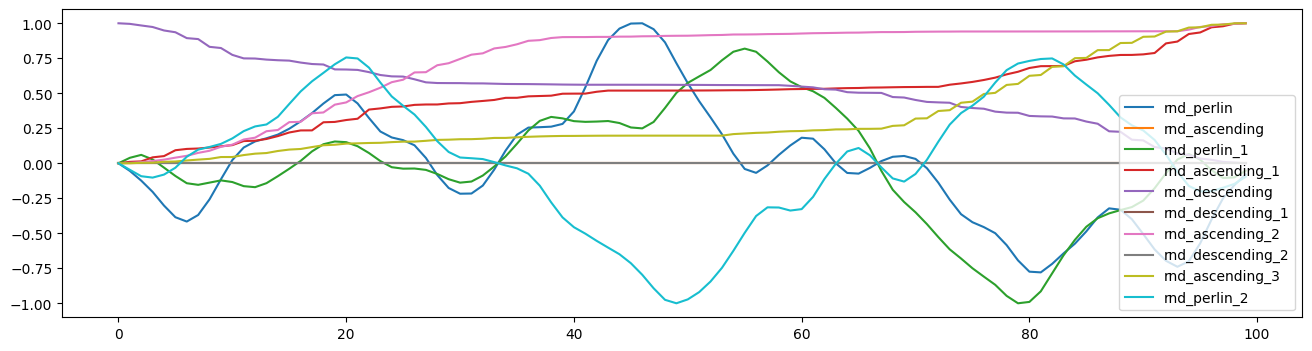

In [96]:
%matplotlib inline
pak.plot(df)

### Random Scaling 
* use scale(), see "Scale Numbers"

min = -0.027317122593032823
max = -0.020680786197726102


<Axes: >

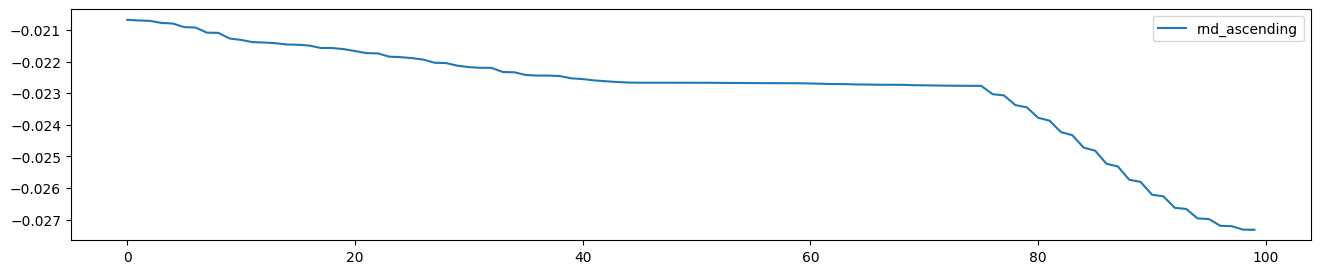

In [97]:
s = pak.random_series(100, 'a') 
s = pak.scale(s, 'random')   

print(  'min =', s.min() )
print(  'max =', s.max() )

%matplotlib inline
pak.plot(s)

### Random Error-prone Series
'errorprone' generates sequences of NaNs, 0, 1 with similar index.
Useful for testing. 

In [98]:
# try this sereral times
pak.random_series( 7, 'errorprone')  

None    0.0
None    0.0
None    0.0
None    NaN
None    NaN
None    NaN
None    0.0
Name: rnd_errorprone_8i3, dtype: float64

## random_perlin()
You can access random perlin noise by the function `random_series` with `typ='perlin'`
of by the function `random_perlin`.

In [99]:
?pak.random_perlin

Signature:
pak.random_perlin(
    shape=(100, 5),
    freq=[3, 6, 12, 24],
    op='add',
    framework=None,
)
Docstring:
Returns a Dataframe with Perlin Noise:
- Every column looks like a random walk.
- The columns correlate (the noise is 2-dim)
* shape: The shape of the result
* freq:  Up to 4 frequencies for the random walk.
         The frequencies are added or multipied with descending factors 1, 1/2, 1/4 and 1/16.
         A frequency of 1 means 1 maximum and 1 minimum.
         A frequency of 2 means 2 maxima  and 2 minima.                
         A frequency of 0 means, that nothing is added for the corresponding factor.
         E.g. freq=[1,0,0,100] gives a very low-frequency random walk 
         with a very slight admixture of high-frequency components. 
* op:    'add' or 'mult', how the frequencies are linked together
File:      Dynamically generated function. No source code available.
Type:      function

In [100]:
# default perlin
df = pak.random_perlin( shape=(100,15) )
df.head(5)

shape: (5, 15)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A        ‚îÜ B         ‚îÜ C         ‚îÜ D         ‚îÜ ‚Ä¶ ‚îÜ L         ‚îÜ M         ‚îÜ N         ‚îÜ O        ‚îÇ
‚îÇ ---      ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---      ‚îÇ
‚îÇ f64      ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ   ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0      ‚îÜ -0.204538 ‚îÜ -0.118602 ‚îÜ -0.293575 ‚îÜ ‚Ä¶ ‚îÜ -0.174805 ‚îÜ -0.2925   ‚îÜ -0.258293 ‚îÜ 0.041022 ‚îÇ
‚îÇ 0.015125 ‚îÜ -0.184912 ‚îÜ -0.122563 ‚îÜ -0.300468 ‚îÜ ‚Ä¶ ‚îÜ -0.19036  ‚îÜ -0.321995 ‚îÜ -0.289745 ‚îÜ 0.050408 ‚îÇ
‚îÇ 0.023674 ‚îÜ -0.164366 ‚îÜ -0.137547 ‚îÜ -0.297597 ‚îÜ ‚Ä¶ ‚îÜ -0.200444 ‚îÜ -0.361418 ‚îÜ -0.321604 ‚îÜ 0.070804 ‚îÇ
‚îÇ 0.026052 ‚îÜ -0.13503  ‚îÜ -0.162037 ‚îÜ -0.285723 ‚îÜ ‚Ä¶ ‚îÜ -0.193705 ‚îÜ -0.400312 ‚îÜ -0.350293 ‚îÜ 0.094265 ‚îÇ
‚îÇ 0.032507 ‚îÜ -0.104839 ‚îÜ -0.191775 ‚îÜ -0.266655 ‚îÜ ‚Ä¶ ‚îÜ -0.170034 ‚îÜ -0.422485 ‚îÜ -0.37149  ‚îÜ 0.104664 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: >

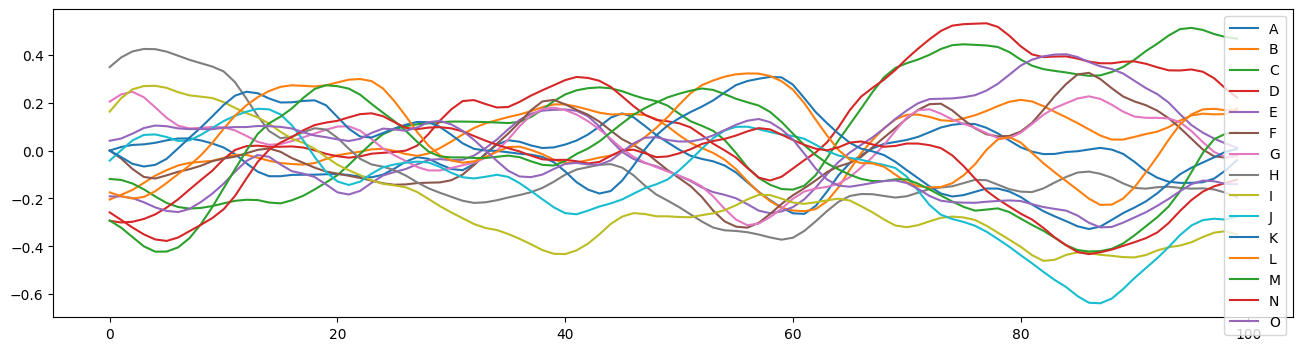

In [101]:
%matplotlib inline
pak.plot(df)

<Axes: >

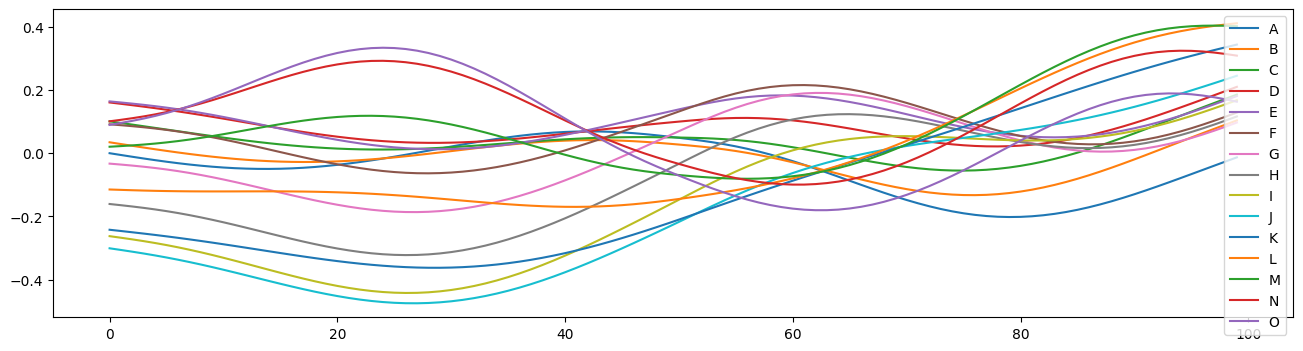

In [102]:
# freq 2 means: 2 minima and 2 maxima
df = pak.random_perlin( shape=(100,15), freq=2 )
pak.plot(df)

<Axes: >

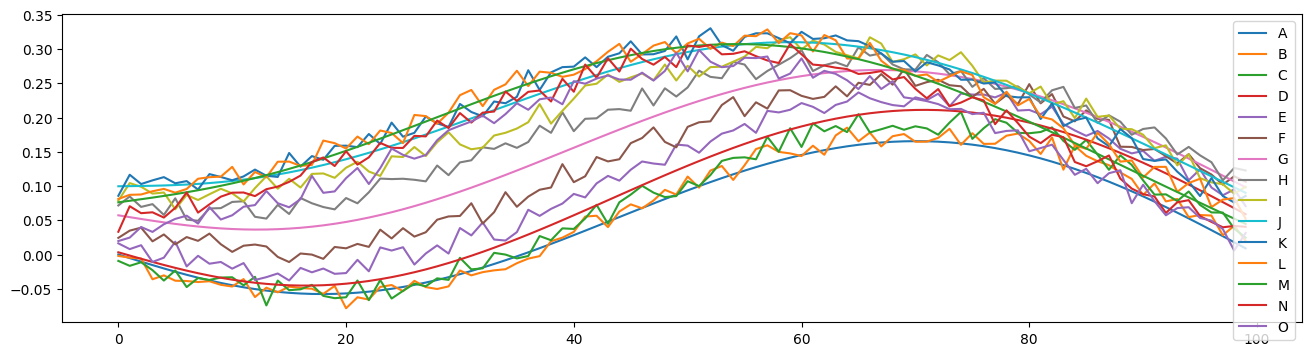

In [103]:
# freq 1 added to a little bit freq 100
df = pak.random_perlin( shape=(100,15), freq=[1,0,0,100] )
pak.plot(df)

<Axes: >

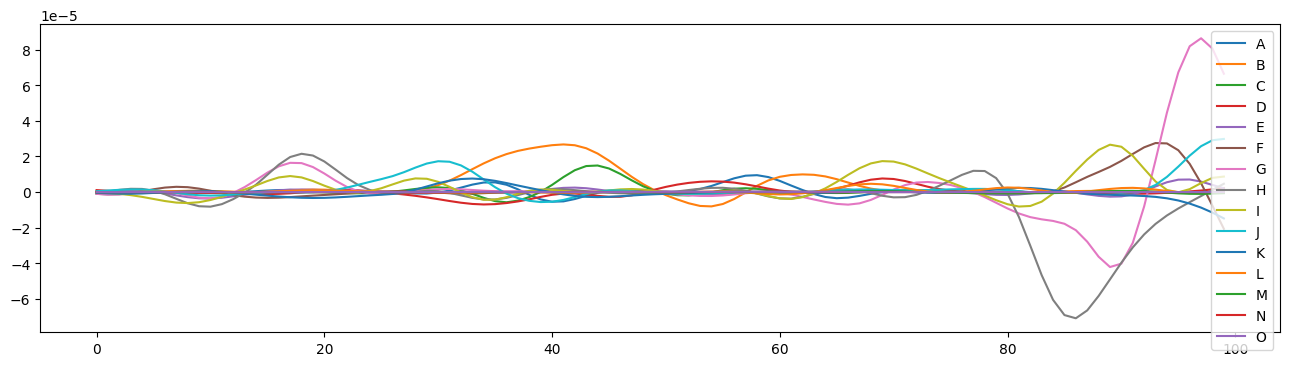

In [104]:
df = pak.random_perlin( shape=(100,15), freq=[1,1,4,8], op='mult')
pak.plot(df)

## decorate()

In [105]:
?pak.decorate

Signature: pak.decorate(skalar, p=0.2, special=nan)
Docstring:
Decorates a series with specials (e.g. NaNs), is applied with apply
e.g. result = result.apply(decorate, p=0.1)               # decorate with 10% nan  
e.g. result = result.apply(decorate, p=0.1, special='a')  # decorate with 10% 'a'.              
File:      /media/me/LinuxDropbox/Dropbox/31_Projekte/01_Python/88_PyCharm/pandasklar/src/pandasklar/content.py
Type:      function

In [114]:
df = pak.dataframe( [ list('Babykorb'), 
                      list('abf√§llig'), 
                      list('Abgr√ºnde'), 
                      list('K√§tzchen'), 
                      list('Landwirt'), 
                      list('lebendig'), 
                      list('Saugrohr'),       
                      list('Trugbild'),                     
                ], framework='pandas' )

df['B'] = df.B.apply( pak.decorate, p=0.2, special='üòÄ') # derzeit nur f√ºr pandas
df['H'] = df.H.apply( pak.decorate, p=0.2)
df

dataframe: Input rtype=('list', 'list', 'str') shape=(8, 8)


A  B  C  D  E  F  G    H
0  B  üòÄ  b  y  k  o  r    b
1  a  b  f  √§  l  l  i    g
2  A  b  g  r  √º  n  d    e
3  K  √§  t  z  c  h  e    n
4  L  a  n  d  w  i  r  NaN
5  l  e  b  e  n  d  i  NaN
6  S  üòÄ  u  g  r  o  h    r
7  T  r  u  g  b  i  l    d

## people(): Easy Random Data

In [115]:
?pak.people

Signature: pak.people(size=100, seed=None, framework=None)
Docstring:
Generates a DataFrame with random people data for testing.

Args:
    size (int, optional): Number of people (rows). Defaults to 100.
    seed (int, optional): Seed for the random generator. Defaults to None.

Returns:
    pd.DataFrame: A DataFrame with columns:
        - first_name (str): Random first names.
        - age (int): Random age between 20 and 42.
        - age_class (int): Age class (rounded to 10s).
        - postal_code (int): Random postal codes.
        - birthplace (str): Random birthplaces (Bremen or Berlin).
        - secret (str): Random strings.
        - features (set): Sets of random strings.
        - history (list): Lists of random strings.
File:      Dynamically generated function. No source code available.
Type:      function

In [116]:
# Test data
df = pak.people(seed=0)
pak.sample(df)

shape: (13, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ first_name ‚îÜ age ‚îÜ age_class ‚îÜ postal_code ‚îÜ birthplace ‚îÜ secret     ‚îÜ features    ‚îÜ history     ‚îÇ
‚îÇ ---        ‚îÜ --- ‚îÜ ---       ‚îÜ ---         ‚îÜ ---        ‚îÜ ---        ‚îÜ ---         ‚îÜ ---         ‚îÇ
‚îÇ str        ‚îÜ i8  ‚îÜ i8        ‚îÜ f64         ‚îÜ str        ‚îÜ str        ‚îÜ list[str]   ‚îÜ list[str]   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Jasmin     ‚îÜ 28  ‚îÜ 20        ‚îÜ 59403.0     ‚îÜ Berlin     ‚îÜ zp√ñYGAfBsn ‚îÜ ["D", "Q",  ‚îÜ []          ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ ‚Ä¶ "B"]      ‚îÜ             ‚îÇ
‚îÇ Artur      ‚îÜ 33  ‚îÜ 30        ‚îÜ 22884.0     ‚îÜ Bremen     ‚îÜ huqEKQhe   ‚îÜ ["o", "N",  ‚îÜ ["A", "A",  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ ‚Ä¶ "F"]      ‚îÜ "A"]        ‚îÇ
‚îÇ Moritz     ‚îÜ 41  ‚îÜ 40        ‚îÜ 19240.0     ‚îÜ Bremen     ‚îÜ 7X6gm8tce  ‚îÜ ["B"]       ‚îÜ ["c", "b",  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ             ‚îÜ "a"]        ‚îÇ
‚îÇ Anja       ‚îÜ 38  ‚îÜ 30        ‚îÜ 45220.0     ‚îÜ Bremen     ‚îÜ Lp√∂yeY4V   ‚îÜ ["q"]       ‚îÜ ["a", "b",  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ             ‚îÜ "c"]        ‚îÇ
‚îÇ Torsten    ‚îÜ 28  ‚îÜ 20        ‚îÜ 36690.0     ‚îÜ Berlin     ‚îÜ WsqCO√§     ‚îÜ ["A", "g"]  ‚îÜ ["A", "B",  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ             ‚îÜ ‚Ä¶ "C"]      ‚îÇ
‚îÇ ‚Ä¶          ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ Charlotte  ‚îÜ 28  ‚îÜ 20        ‚îÜ 99637.0     ‚îÜ null       ‚îÜ aILDs      ‚îÜ ["J", "m",  ‚îÜ ["A", "B",  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ ‚Ä¶ "u"]      ‚îÜ ‚Ä¶ "C"]      ‚îÇ
‚îÇ Melanie    ‚îÜ 31  ‚îÜ 30        ‚îÜ 36338.0     ‚îÜ Bremen     ‚îÜ 06g√∂i36    ‚îÜ ["J", "O",  ‚îÜ ["A", "x"]  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ ‚Ä¶ "H"]      ‚îÜ             ‚îÇ
‚îÇ Harald     ‚îÜ 34  ‚îÜ 30        ‚îÜ 58018.0     ‚îÜ Berlin     ‚îÜ 64pkkEmt   ‚îÜ ["t", "d",  ‚îÜ ["c", "b",  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ "l"]        ‚îÜ "a"]        ‚îÇ
‚îÇ Jakob      ‚îÜ 31  ‚îÜ 30        ‚îÜ 73552.0     ‚îÜ Bremen     ‚îÜ √ºiORy3sa√§  ‚îÜ ["h", "T",  ‚îÜ ["A", "x"]  ‚îÇ
‚îÇ            ‚îÜ     ‚îÜ           ‚îÜ             ‚îÜ            ‚îÜ            ‚îÜ ‚Ä¶ "I"]      ‚îÜ             ‚îÇ
‚îÇ Phil       ‚îÜ 33  ‚îÜ 30        ‚îÜ 54747.0     ‚îÜ Bremen     ‚îÜ uXU7eo     ‚îÜ ["b", "5"]  ‚îÜ ["A", "x"]  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [117]:
pak.analyse_cols(df)

AttributeError: 'DataFrame' object has no attribute 'iloc'

In [118]:
bpy.rtype(df['history'])

('Series', 'Series')

## random_numbers()

In [125]:
?pak.random_numbers

Signature: pak.random_numbers(size=1000, seed=None, framework=None)
Docstring:
Returns a DataFrame with random numbers for testing.

Args:
    size (int, optional): Number of rows. Defaults to 1000.
    seed (int, optional): Seed for the random generator. Defaults to None.

Returns:
    pd.DataFrame: A DataFrame with columns 'A', 'B' (int), 'C', 'D', 'E' (float).
File:      Dynamically generated function. No source code available.
Type:      function

In [127]:
# Test data
df = pak.random_numbers()
pak.sample(df)

shape: (14, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ B     ‚îÜ C     ‚îÜ D    ‚îÜ E        ‚îÇ
‚îÇ --- ‚îÜ ---   ‚îÜ ---   ‚îÜ ---  ‚îÜ ---      ‚îÇ
‚îÇ i8  ‚îÜ i32   ‚îÜ f32   ‚îÜ f32  ‚îÜ f32      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 33  ‚îÜ 69227 ‚îÜ 0.115 ‚îÜ 5.85 ‚îÜ 0.0      ‚îÇ
‚îÇ 33  ‚îÜ 10128 ‚îÜ 0.592 ‚îÜ 0.78 ‚îÜ 0.000031 ‚îÇ
‚îÇ 30  ‚îÜ 57558 ‚îÜ 0.567 ‚îÜ 1.69 ‚îÜ 0.000232 ‚îÇ
‚îÇ 32  ‚îÜ 99532 ‚îÜ 0.987 ‚îÜ 9.99 ‚îÜ 0.00084  ‚îÇ
‚îÇ 31  ‚îÜ 83109 ‚îÜ 0.891 ‚îÜ 0.0  ‚îÜ 0.000844 ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 28  ‚îÜ 99984 ‚îÜ 0.75  ‚îÜ 0.43 ‚îÜ 0.021701 ‚îÇ
‚îÇ 33  ‚îÜ 17194 ‚îÜ 0.39  ‚îÜ 0.54 ‚îÜ 0.075109 ‚îÇ
‚îÇ 31  ‚îÜ 75304 ‚îÜ 0.014 ‚îÜ 1.24 ‚îÜ 0.075109 ‚îÇ
‚îÇ 20  ‚îÜ 49328 ‚îÜ 0.001 ‚îÜ 1.78 ‚îÜ 0.075333 ‚îÇ
‚îÇ 25  ‚îÜ 71189 ‚îÜ 0.888 ‚îÜ 6.43 ‚îÜ 1.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [121]:
pak.analyse_cols(df)

AttributeError: 'DataFrame' object has no attribute 'iloc'

<Axes: >

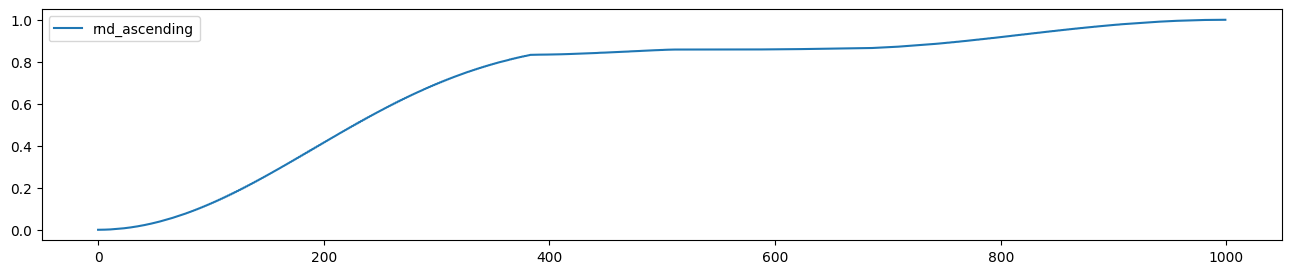

In [124]:
pak.plot(df['rnd_ascending'])

## Spielwiese

In [ ]:
?pak.sample

In [ ]:
pak.specials(df, indicator=True) #.head(10)

In [132]:
pak.type_info(np.int32).info()

{'instance1': None,
 'instance2': None,
 'name': 'np.int32',
 'framework': 'np',
 'name_short': 'int32',
 'name_long': 'np.int32',
 'class_object': numpy.int32,
 'is_hashable': True,
 'nan_allowed': False,
 'name_instance': '',
 'xmin': -2147483648,
 'xmax': 2147483647}